# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through cities
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | college
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | hawaiian paradise park
Processing Record 6 of Set 1 | papatowai
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | taybad
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | kulhudhuffushi
Processing Record 11 of Set 1 | saint-pierre
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | ciudad lazaro cardenas
Processing Record 14 of Set 1 | crane
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 18 of Set 1 | kapuskasing
Processing Record 19 of Set 1 | saipan
Processing Record 20 of Set 1 | calvinia
Processing Record 21 of Set 1 | ma

Processing Record 40 of Set 4 | kudahuvadhoo
Processing Record 41 of Set 4 | abadeh
Processing Record 42 of Set 4 | zhezqazghan
Processing Record 43 of Set 4 | farah
Processing Record 44 of Set 4 | nuuk
Processing Record 45 of Set 4 | daulatpur
Processing Record 46 of Set 4 | biltine
Processing Record 47 of Set 4 | sinjai
Processing Record 48 of Set 4 | oranjemund
Processing Record 49 of Set 4 | sao jose da coroa grande
Processing Record 0 of Set 5 | whitehorse
Processing Record 1 of Set 5 | arraial do cabo
Processing Record 2 of Set 5 | soe
Processing Record 3 of Set 5 | mankono
Processing Record 4 of Set 5 | eforie sud
Processing Record 5 of Set 5 | enriquillo
Processing Record 6 of Set 5 | tobi village
City not found. Skipping...
Processing Record 7 of Set 5 | kotel'nikovo
Processing Record 8 of Set 5 | ha giang
Processing Record 9 of Set 5 | polyarnyy
Processing Record 10 of Set 5 | labasa
Processing Record 11 of Set 5 | west island
Processing Record 12 of Set 5 | lae
Processing Re

Processing Record 35 of Set 8 | samarinda
Processing Record 36 of Set 8 | jackson
Processing Record 37 of Set 8 | zalanga
Processing Record 38 of Set 8 | tevragh zeina
City not found. Skipping...
Processing Record 39 of Set 8 | tubarjal
Processing Record 40 of Set 8 | pokachi
Processing Record 41 of Set 8 | esmeraldas
Processing Record 42 of Set 8 | dong ha
Processing Record 43 of Set 8 | nyakahanga
Processing Record 44 of Set 8 | qulsary
Processing Record 45 of Set 8 | yuzhno-kurilsk
Processing Record 46 of Set 8 | horta
Processing Record 47 of Set 8 | santa terezinha
Processing Record 48 of Set 8 | seelow
Processing Record 49 of Set 8 | reyes
Processing Record 0 of Set 9 | cidreira
Processing Record 1 of Set 9 | luebo
Processing Record 2 of Set 9 | selfoss
Processing Record 3 of Set 9 | cannonvale
Processing Record 4 of Set 9 | ji'an
Processing Record 5 of Set 9 | corinto
Processing Record 6 of Set 9 | fort bragg
Processing Record 7 of Set 9 | casino
Processing Record 8 of Set 9 | gi

Processing Record 23 of Set 12 | grand falls-windsor
Processing Record 24 of Set 12 | morondava
Processing Record 25 of Set 12 | karaton
Processing Record 26 of Set 12 | belle chasse
Processing Record 27 of Set 12 | al mazar al janubi
Processing Record 28 of Set 12 | trzebiatow
Processing Record 29 of Set 12 | sihanoukville
Processing Record 30 of Set 12 | kapoeta
Processing Record 31 of Set 12 | carolina beach
Processing Record 32 of Set 12 | chernyshevskiy
Processing Record 33 of Set 12 | el nido
Processing Record 34 of Set 12 | bignona
Processing Record 35 of Set 12 | majuro
Processing Record 36 of Set 12 | ocean pines
Processing Record 37 of Set 12 | port blair
Processing Record 38 of Set 12 | huruta
Processing Record 39 of Set 12 | kashin
Processing Record 40 of Set 12 | salym
Processing Record 41 of Set 12 | korla
Processing Record 42 of Set 12 | massawa
Processing Record 43 of Set 12 | slobozia
Processing Record 44 of Set 12 | tshikapa
Processing Record 45 of Set 12 | chiredzi
P

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0                 college  64.8569 -147.8028     53.55        86          75   
1                waitangi -43.9535 -176.5597     54.82        80         100   
2       port-aux-francais -49.3500   70.2167     33.60        60          99   
3                hermanus -34.4187   19.2345     42.80        81          82   
4  hawaiian paradise park  19.5933 -154.9731     81.03        81         100   

   Wind Speed Country        Date  
0       12.66      US  1693884541  
1        4.00      NZ  1693884541  
2       25.23      TF  1693884541  
3       12.53      ZA  1693884541  
4        9.22      US  1693884542

In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("..\output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("..\output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                                  
0                       college  64.8569 -147.8028     53.55        86   
1                      waitangi -43.9535 -176.5597     54.82        80   
2             port-aux-francais -49.3500   70.2167     33.60        60   
3                      hermanus -34.4187   19.2345     42.80        81   
4        hawaiian paradise park  19.5933 -154.9731     81.03        81   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
0                75       12.66      US  1693884541  
1               100        4.00      NZ  1693884541  
2                99       25.23      TF  1693884541  
3                82       12.53      ZA  1693884541  
4               100        9.22      US  1693884542

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

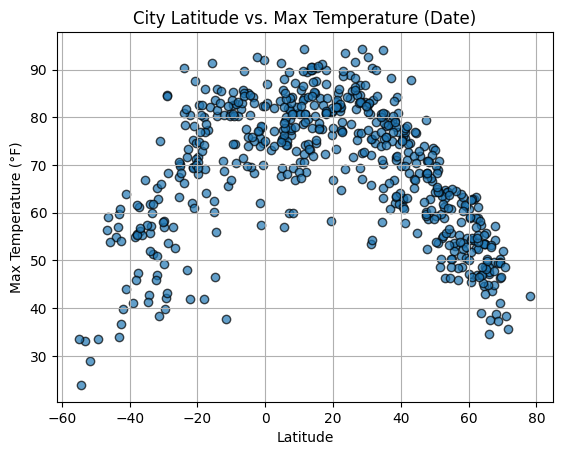

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("..\output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

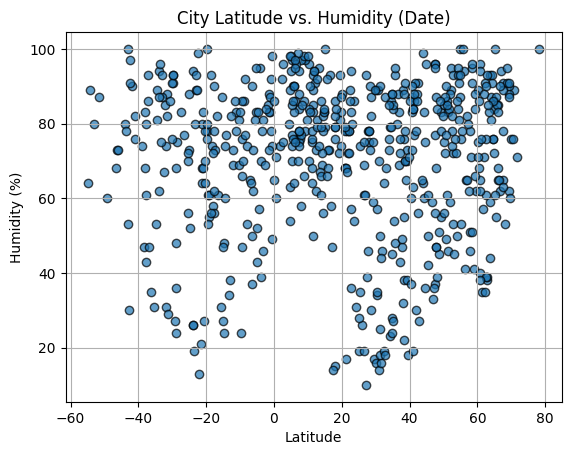

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("..\output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

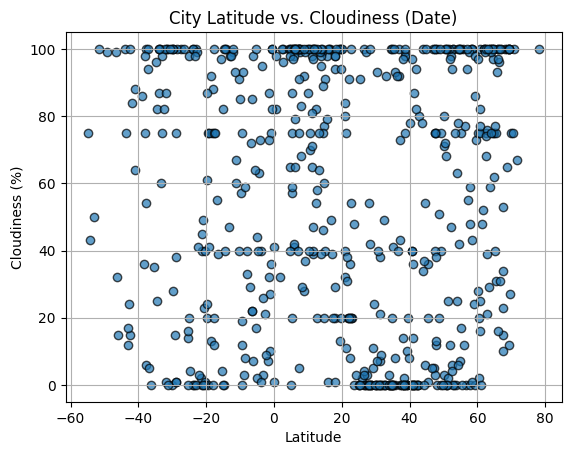

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("..\output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

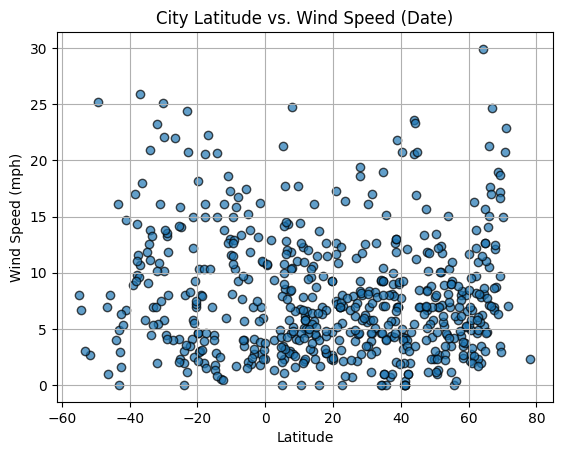

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("..\output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress

def compute_linear_regression(x_values, y_values):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Return the linear regression parameters
    return slope, intercept, rvalue, pvalue, stderr

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                                  
0                       college  64.8569 -147.8028     53.55        86   
4        hawaiian paradise park  19.5933 -154.9731     81.03        81   
7                        taybad  34.7400   60.7756     70.30        28   
9                kulhudhuffushi   6.6221   73.0700     81.95        76   
11                  yellowknife  62.4560 -114.3525     46.92        61   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
0                75       12.66      US  1693884541  
4               100        9.22      US  1693884542  
7                 0       10.45      IR  1693884542  
9               100       14.32      MV  1693884543  
11               75        4.61      CA  1693884337

In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                         
1                 waitangi -43.9535 -176.5597     54.82        80         100   
2        port-aux-francais -49.3500   70.2167     33.60        60          99   
3                 hermanus -34.4187   19.2345     42.80        81          82   
5                papatowai -46.5619  169.4708     56.30        68          99   
6                adamstown -25.0660 -130.1015     70.27        88          98   

         Wind Speed Country        Date  
City_ID                                  
1              4.00      NZ  1693884541  
2             25.23      TF  1693884541  
3             12.53      ZA  1693884541  
5              6.96      NZ  1693884542  
6             15.86      PN  1693884542

###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6185084139618543


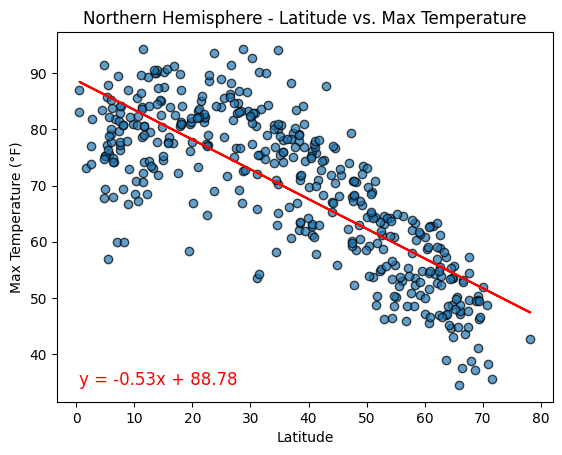

In [15]:
# Linear regression on Northern Hemisphere
def plot_linear_regression(x_values, y_values, title, x_label, y_label):
    # Compute linear regression
    slope, intercept, rvalue, pvalue, stderr = compute_linear_regression(x_values, y_values)

    # Calculate the regression line
    regress_values = x_values * slope + intercept

    # Create the scatter plot
    plt.scatter(x_values, y_values, marker="o", edgecolors="black", alpha=0.7)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")

    # Annotate the equation on the plot
    plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", (min(x_values), min(y_values)), fontsize=12, color="red")

    # Set title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Print the r-squared value
    print(f"The r-squared is: {rvalue**2}")

    # Show plot
    plt.show()

# Create a plot for Northern Hemisphere latitude vs. max temperature
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Northern Hemisphere - Latitude vs. Max Temperature", "Latitude", "Max Temperature (°F)")


The r-squared is: 0.5105267745470784


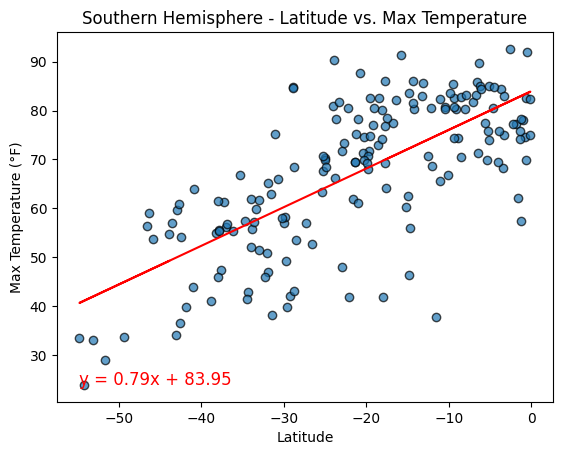

In [16]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Southern Hemisphere - Latitude vs. Max Temperature", "Latitude", "Max Temperature (°F)")

**Discussion about the linear relationship:** As a trend, the lower the max temp, the lower the lattitude is. Locations closer to the south pole are colder.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.002256942044638688


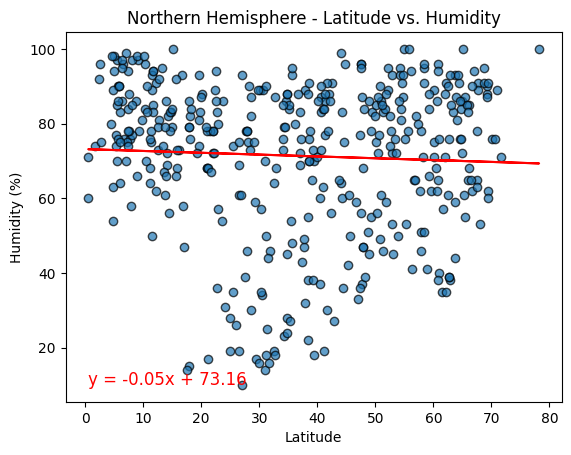

In [17]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Northern Hemisphere - Latitude vs. Humidity", "Latitude", "Humidity (%)")

The r-squared is: 0.0005090520384989214


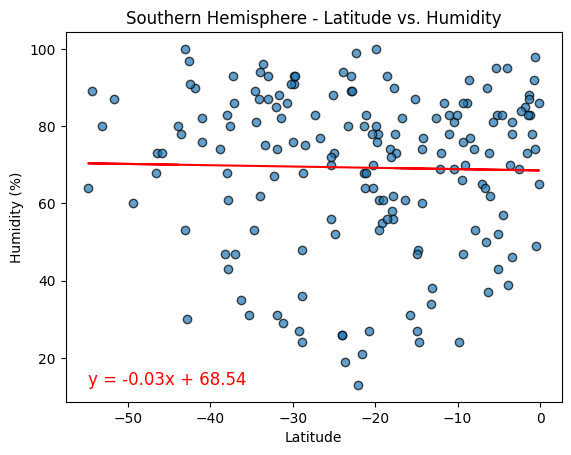

In [18]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Southern Hemisphere - Latitude vs. Humidity", "Latitude", "Humidity (%)")

**Discussion about the linear relationship:** Lattitude in the southern hemisphere seems to have little relationship with the relative humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0029271158717545835


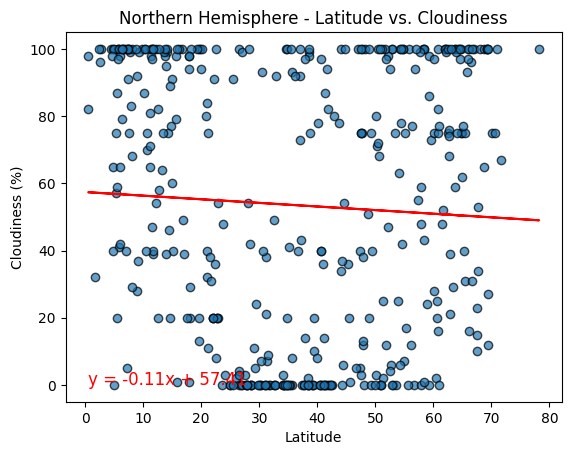

In [19]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Northern Hemisphere - Latitude vs. Cloudiness", "Latitude", "Cloudiness (%)")

The r-squared is: 0.022591078182328066


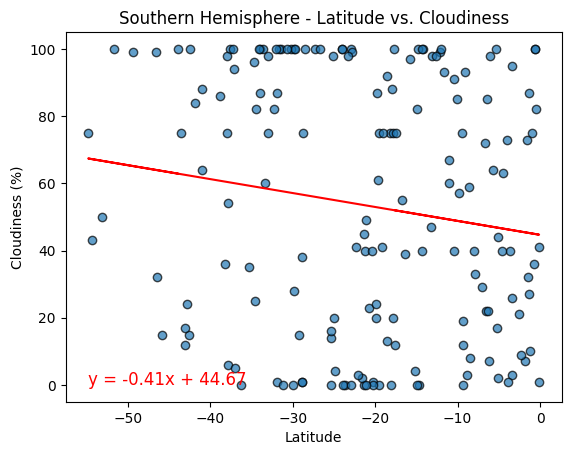

In [20]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Southern Hemisphere - Latitude vs. Cloudiness", "Latitude", "Cloudiness (%)")

**Discussion about the linear relationship:** There is very small negligible trend that the greater the lattitude from the equator, the cloudier it is. But the r value is soo small that it is not conclusive.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.009817623364750656


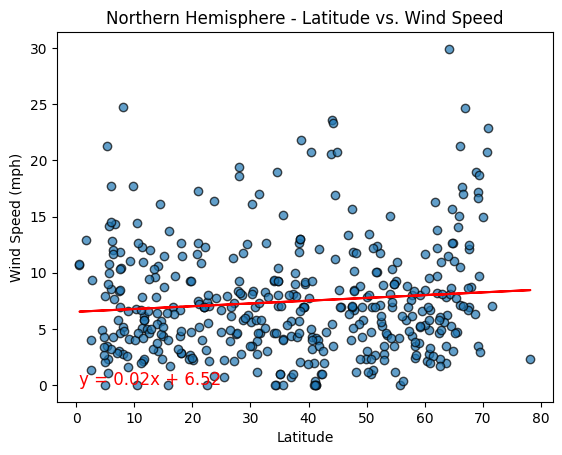

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Northern Hemisphere - Latitude vs. Wind Speed", "Latitude", "Wind Speed (mph)")

The r-squared is: 0.010749652927111641


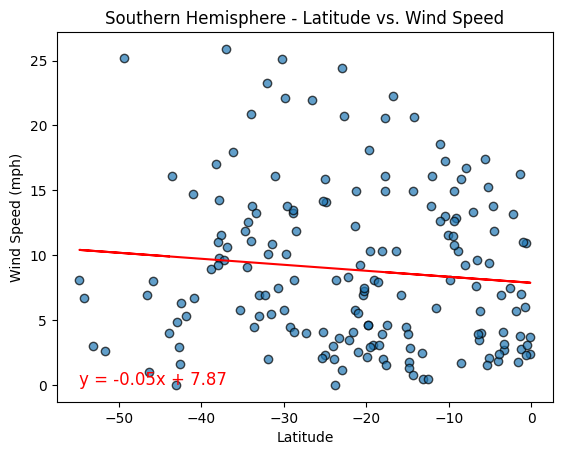

In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Southern Hemisphere - Latitude vs. Wind Speed", "Latitude", "Wind Speed (mph)")

**Discussion about the linear relationship:** There is no real relationship with lattitude in the southern hemisphere and the wind speed.